In [54]:
import numpy as np
import pandas as pd
import datetime as dt
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import re
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from dateutil.relativedelta import relativedelta
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

경화 =  '고유거래일수', '평균구매주기', '추가구매일수', '가입기간', '구매카테고리수', 'used개수', 'not used개수',

In [55]:
rfm_core = pd.read_csv("C:/Users/user/OneDrive/Desktop/끙/끙2/프로젝트/5차 최종플젝/팀단위/rfm_core.csv")


In [56]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['고유거래일수'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,1.482371,0.731945,1.283140,1.272483,0.719695,1.199817,0.721768
1,0.785810,0.772127,0.724009,1.377040,1.719564,0.757721,1.284230
2,0.797648,1.282547,1.620345,0.725626,0.714064,1.284230,1.201167
3,NaN,1.590631,0.842114,0.718756,0.876060,1.478269,1.478081
4,NaN,NaN,0.731852,1.712165,1.270042,0.714231,1.800504
5,NaN,NaN,NaN,0.837325,0.762953,0.700846,0.882690
6,NaN,NaN,NaN,NaN,1.380965,1.805590,0.703284
7,NaN,NaN,NaN,NaN,NaN,0.873274,0.700726
8,NaN,NaN,NaN,NaN,NaN,NaN,0.772221


In [57]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['평균구매주기'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,-0.190108,0.349247,-0.039015,-0.046236,0.415464,0.058805,0.263096
1,0.299667,0.034639,0.239091,-0.122498,-0.393549,-0.003856,-0.101836
2,-0.018552,-0.028663,-0.319819,0.232515,0.325014,-0.101836,0.071067
3,NaN,-0.367423,-0.190088,0.388194,-0.212550,-0.169057,-0.168764
4,NaN,NaN,0.384533,-0.394576,-0.040413,0.319250,-0.463538
5,NaN,NaN,NaN,-0.181227,-0.027401,0.435150,-0.252920
6,NaN,NaN,NaN,NaN,-0.110708,-0.467972,0.341700
7,NaN,NaN,NaN,NaN,NaN,-0.211124,0.459589
8,NaN,NaN,NaN,NaN,NaN,NaN,-0.036235


In [58]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['추가구매일수'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,1.198710,0.065744,0.944157,0.929283,0.045385,0.833931,0.048928
1,0.153165,0.134715,0.052759,1.068116,1.495076,0.110390,0.944573
2,0.177291,0.943300,1.374822,0.055523,0.035758,0.944573,0.835808
3,NaN,1.334925,0.252998,0.043778,0.309093,1.200702,1.200303
4,NaN,NaN,0.065725,1.485910,0.925971,0.036044,1.593828
5,NaN,NaN,NaN,0.244744,0.119333,0.013161,0.320530
6,NaN,NaN,NaN,NaN,1.073421,1.599734,0.017329
7,NaN,NaN,NaN,NaN,NaN,0.304386,0.012956
8,NaN,NaN,NaN,NaN,NaN,NaN,0.134784


In [59]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['가입기간'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,-0.012785,-0.012764,-0.059910,-0.052989,-0.022708,-0.045562,0.009388
1,-0.033535,0.034359,0.019839,-0.018287,-0.019685,0.049823,-0.028958
2,0.032783,-0.057819,0.000785,0.021851,0.008003,-0.028958,-0.064407
3,NaN,0.001961,0.059361,-0.050276,-0.002199,0.000863,-0.004332
4,NaN,NaN,-0.051104,-0.034063,-0.038880,0.017763,-0.009693
5,NaN,NaN,NaN,0.063813,0.036221,-0.055384,0.050112
6,NaN,NaN,NaN,NaN,0.003926,-0.018994,-0.076111
7,NaN,NaN,NaN,NaN,NaN,0.009207,0.006967
8,NaN,NaN,NaN,NaN,NaN,NaN,0.043599


In [60]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['구매카테고리수'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,0.709882,-1.155270,-0.116687,-0.459003,-1.372285,-0.738996,-0.546877
1,-1.064603,-0.015571,-0.518912,0.435559,1.494946,-0.138661,-0.031766
2,0.034802,-0.081609,1.176219,-0.506261,-0.698833,-0.031766,-0.740261
3,NaN,1.195160,0.445935,-1.347402,0.688341,0.728176,0.724797
4,NaN,NaN,-1.340275,1.490518,-0.464481,-0.704291,1.735885
5,NaN,NaN,NaN,0.450781,-0.128128,-1.384623,0.720071
6,NaN,NaN,NaN,NaN,0.428505,1.746887,-1.051867
7,NaN,NaN,NaN,NaN,NaN,0.674420,-1.470813
8,NaN,NaN,NaN,NaN,NaN,NaN,-0.013803


In [61]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['used개수'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,2.820969,0.704169,1.955112,1.550996,0.408859,1.220705,1.534931
1,0.818231,2.132017,1.557385,2.549982,3.607635,1.989937,2.052675
2,2.181833,1.986935,3.292282,1.567346,1.347728,2.052675,1.227739
3,NaN,3.315891,2.617480,0.460363,2.880036,2.893755,2.887718
4,NaN,NaN,0.467489,3.604727,1.543111,1.334349,3.775612
5,NaN,NaN,NaN,2.633488,1.996487,0.401461,2.919569
6,NaN,NaN,NaN,NaN,2.552130,3.779831,0.880969
7,NaN,NaN,NaN,NaN,NaN,2.867061,0.245677
8,NaN,NaN,NaN,NaN,NaN,NaN,2.125431


In [62]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['not used개수'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
k_mean_purchase_by_cluster

,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels
0,2.046816,0.426561,1.245685,0.984332,0.268890,0.791265,0.910601
1,0.506245,1.423918,0.938758,1.764529,2.824732,1.297587,1.280910
2,1.466177,1.268109,2.516025,0.946578,0.760732,1.280910,0.801816
3,NaN,2.549571,1.880049,0.272722,2.122485,2.134614,2.128362
4,NaN,NaN,0.282056,2.817663,0.978481,0.752013,2.985738
5,NaN,NaN,NaN,1.889561,1.307064,0.268360,2.173718
6,NaN,NaN,NaN,NaN,1.763302,2.989062,0.418304
7,NaN,NaN,NaN,NaN,NaN,2.114848,0.205709
8,NaN,NaN,NaN,NaN,NaN,NaN,1.427244


In [63]:
rfm_core2=rfm_core

In [64]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['고유거래일수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['고유거래일수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['고유거래일수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,1.482371,3.555348,1.098612,0.731945,1.386294,0.693147,1.283140,2.302585,1.098612,1.272483,2.079442,1.098612,0.719695,1.098612,0.693147,1.199817,1.791759,1.098612,0.721768,1.098612,0.693147
1,0.785810,1.791759,0.693147,0.772127,1.386294,0.693147,0.724009,1.098612,0.693147,1.377040,2.772589,1.098612,1.719564,3.555348,1.098612,0.757721,1.098612,0.693147,1.284230,2.302585,1.098612
2,0.797648,1.609438,0.693147,1.282547,2.302585,1.098612,1.620345,3.555348,1.098612,0.725626,1.098612,0.693147,0.714064,1.098612,0.693147,1.284230,2.302585,1.098612,1.201167,1.791759,1.098612
3,NaN,NaN,NaN,1.590631,3.555348,0.693147,0.842114,1.609438,0.693147,0.718756,1.098612,0.693147,0.876060,1.609438,0.693147,1.478269,2.772589,1.098612,1.478081,2.772589,1.098612
4,NaN,NaN,NaN,NaN,NaN,NaN,0.731852,1.386294,0.693147,1.712165,3.555348,1.098612,1.270042,2.079442,1.098612,0.714231,1.098612,0.693147,1.800504,3.555348,1.098612
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837325,1.609438,0.693147,0.762953,1.098612,0.693147,0.700846,1.098612,0.693147,0.882690,1.609438,0.693147
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380965,2.772589,1.098612,1.805590,3.555348,1.098612,0.703284,1.098612,0.693147
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873274,1.609438,0.693147,0.700726,1.098612,0.693147
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772221,1.386294,0.693147


In [65]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['평균구매주기'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['평균구매주기'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['평균구매주기'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,-0.190108,2.224524,-1.555082,0.349247,2.356755,-1.654255,-0.039015,2.070254,-1.477947,-0.046236,2.070254,-1.477947,0.415464,2.356755,-1.654255,0.058805,2.070254,-1.301639,0.263096,2.345736,-1.654255
1,0.299667,2.356755,-1.654255,0.034639,2.345736,-1.654255,0.239091,2.345736,-1.654255,-0.122498,2.202486,-1.433870,-0.393549,2.224524,-1.555082,-0.003856,2.345736,-1.654255,-0.101836,2.059235,-1.477947
2,-0.018552,2.345736,-1.654255,-0.028663,2.202486,-1.477947,-0.319819,2.224524,-1.555082,0.232515,2.345736,-1.654255,0.325014,2.345736,-1.654255,-0.101836,2.059235,-1.477947,0.071067,2.070254,-1.301639
3,NaN,NaN,NaN,-0.367423,2.224524,-1.555082,-0.190088,2.334717,-1.654255,0.388194,2.356755,-1.654255,-0.212550,2.334717,-1.643236,-0.169057,2.202486,-1.433870,-0.168764,2.202486,-1.433870
4,NaN,NaN,NaN,NaN,NaN,NaN,0.384533,2.356755,-1.654255,-0.394576,2.224524,-1.555082,-0.040413,2.070254,-1.301639,0.319250,2.345736,-1.654255,-0.463538,2.224524,-1.555082
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.181227,2.334717,-1.654255,-0.027401,2.312678,-1.654255,0.435150,2.356755,-1.654255,-0.252920,2.334717,-1.643236
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.110708,2.202486,-1.433870,-0.467972,2.224524,-1.555082,0.341700,2.345736,-1.654255
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.211124,2.334717,-1.643236,0.459589,2.356755,-1.610178
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036235,2.312678,-1.654255


In [66]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['추가구매일수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['추가구매일수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['추가구매일수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,1.198710,3.526361,0.693147,0.065744,1.098612,0.000000,0.944157,2.197225,0.693147,0.929283,1.945910,0.693147,0.045385,0.693147,0.000000,0.833931,1.609438,0.693147,0.048928,0.693147,0.000000
1,0.153165,1.609438,0.000000,0.134715,1.098612,0.000000,0.052759,0.693147,0.000000,1.068116,2.708050,0.693147,1.495076,3.526361,0.693147,0.110390,0.693147,0.000000,0.944573,2.197225,0.693147
2,0.177291,1.386294,0.000000,0.943300,2.197225,0.693147,1.374822,3.526361,0.693147,0.055523,0.693147,0.000000,0.035758,0.693147,0.000000,0.944573,2.197225,0.693147,0.835808,1.609438,0.693147
3,NaN,NaN,NaN,1.334925,3.526361,0.000000,0.252998,1.386294,0.000000,0.043778,0.693147,0.000000,0.309093,1.386294,0.000000,1.200702,2.708050,0.693147,1.200303,2.708050,0.693147
4,NaN,NaN,NaN,NaN,NaN,NaN,0.065725,1.098612,0.000000,1.485910,3.526361,0.693147,0.925971,1.945910,0.693147,0.036044,0.693147,0.000000,1.593828,3.526361,0.693147
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244744,1.386294,0.000000,0.119333,0.693147,0.000000,0.013161,0.693147,0.000000,0.320530,1.386294,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.073421,2.708050,0.693147,1.599734,3.526361,0.693147,0.017329,0.693147,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304386,1.386294,0.000000,0.012956,0.693147,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134784,1.098612,0.000000


In [67]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['가입기간'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['가입기간'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['가입기간'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,-0.012785,1.726122,-1.713528,-0.012764,1.726122,-1.713528,-0.059910,1.726122,-1.713528,-0.052989,1.726122,-1.713528,-0.022708,1.726122,-1.713528,-0.045562,1.726122,-1.713528,0.009388,1.726122,-1.713528
1,-0.033535,1.726122,-1.713528,0.034359,1.726122,-1.713528,0.019839,1.726122,-1.713528,-0.018287,1.726122,-1.713528,-0.019685,1.726122,-1.713528,0.049823,1.726122,-1.713528,-0.028958,1.726122,-1.713528
2,0.032783,1.726122,-1.713528,-0.057819,1.726122,-1.713528,0.000785,1.726122,-1.713528,0.021851,1.726122,-1.713528,0.008003,1.726122,-1.713528,-0.028958,1.726122,-1.713528,-0.064407,1.726122,-1.713528
3,NaN,NaN,NaN,0.001961,1.726122,-1.713528,0.059361,1.726122,-1.713528,-0.050276,1.726122,-1.713528,-0.002199,1.726122,-1.713528,0.000863,1.726122,-1.713528,-0.004332,1.726122,-1.713528
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.051104,1.726122,-1.713528,-0.034063,1.726122,-1.713528,-0.038880,1.726122,-1.713528,0.017763,1.726122,-1.713528,-0.009693,1.726122,-1.713528
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063813,1.726122,-1.713528,0.036221,1.726122,-1.713528,-0.055384,1.726122,-1.713528,0.050112,1.726122,-1.713528
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003926,1.726122,-1.713528,-0.018994,1.726122,-1.713528,-0.076111,1.726122,-1.713528
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009207,1.726122,-1.713528,0.006967,1.726122,-1.641868
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043599,1.726122,-1.713528


In [68]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['구매카테고리수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['구매카테고리수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['구매카테고리수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,0.709882,4.061388,-1.271454,-1.155270,0.610725,-1.585151,-0.116687,1.865512,-1.585151,-0.459003,0.610725,-1.585151,-1.372285,-0.016668,-1.585151,-0.738996,0.610725,-1.585151,-0.546877,0.610725,-1.585151
1,-1.064603,0.610725,-1.585151,-0.015571,2.492905,-1.585151,-0.518912,0.924422,-1.585151,0.435559,2.179208,-1.271454,1.494946,4.061388,-0.016668,-0.138661,1.238119,-1.585151,-0.031766,1.865512,-1.271454
2,0.034802,2.492905,-1.585151,-0.081609,2.179208,-1.585151,1.176219,4.061388,-0.330364,-0.506261,0.924422,-1.585151,-0.698833,0.610725,-1.585151,-0.031766,1.865512,-1.271454,-0.740261,0.610725,-1.585151
3,NaN,NaN,NaN,1.195160,4.061388,-0.330364,0.445935,2.492905,-0.957758,-1.347402,-0.016668,-1.585151,0.688341,2.492905,-0.957758,0.728176,2.179208,-0.644061,0.724797,2.179208,-0.644061
4,NaN,NaN,NaN,NaN,NaN,NaN,-1.340275,-0.016668,-1.585151,1.490518,4.061388,-0.016668,-0.464481,0.610725,-1.585151,-0.704291,0.610725,-1.585151,1.735885,4.061388,0.297029
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450781,2.492905,-0.957758,-0.128128,1.238119,-1.585151,-1.384623,-0.016668,-1.585151,0.720071,2.492905,-0.957758
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428505,2.179208,-1.271454,1.746887,4.061388,0.297029,-1.051867,0.297029,-1.585151
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674420,2.492905,-0.957758,-1.470813,-0.644061,-1.585151
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013803,1.551815,-1.271454


In [69]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['used개수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['used개수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['used개수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,2.820969,5.533389,0.693147,0.704169,2.302585,0.000000,1.955112,2.995732,0.000000,1.550996,2.484907,0.000000,0.408859,1.609438,0.000000,1.220705,2.302585,0.000000,1.534931,2.639057,0.693147
1,0.818231,2.302585,0.000000,2.132017,3.850148,0.693147,1.557385,2.772589,0.000000,2.549982,3.583519,1.098612,3.607635,5.533389,2.564949,1.989937,2.944439,0.693147,2.052675,2.995732,0.693147
2,2.181833,3.850148,0.693147,1.986935,2.995732,0.000000,3.292282,5.533389,2.079442,1.567346,2.772589,0.000000,1.347728,2.397895,0.000000,2.052675,2.995732,0.693147,1.227739,2.302585,0.000000
3,NaN,NaN,NaN,3.315891,5.533389,2.079442,2.617480,4.110874,1.098612,0.460363,1.609438,0.000000,2.880036,4.110874,1.098612,2.893755,3.688879,1.791759,2.887718,3.688879,1.791759
4,NaN,NaN,NaN,NaN,NaN,NaN,0.467489,1.609438,0.000000,3.604727,5.533389,2.564949,1.543111,2.484907,0.000000,1.334349,2.397895,0.000000,3.775612,5.533389,2.639057
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.633488,4.110874,1.098612,1.996487,2.944439,0.693147,0.401461,1.609438,0.000000,2.919569,4.110874,1.791759
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.552130,3.583519,1.098612,3.779831,5.533389,2.639057,0.880969,2.079442,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.867061,4.110874,1.098612,0.245677,1.098612,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125431,2.995732,0.693147


In [70]:
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['not used개수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['not used개수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['not used개수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,k_3_labels_mean,k_3_labels_max,k_3_labels_min,k_4_labels_mean,k_4_labels_max,k_4_labels_min,k_5_labels_mean,k_5_labels_max,k_5_labels_min,k_6_labels_mean,k_6_labels_max,k_6_labels_min,k_7_labels_mean,k_7_labels_max,k_7_labels_min,k_8_labels_mean,k_8_labels_max,k_8_labels_min,k_9_labels_mean,k_9_labels_max,k_9_labels_min
0,2.046816,4.753590,0.0,0.426561,1.945910,0.000000,1.245685,2.397895,0.000000,0.984332,2.197225,0.000000,0.268890,1.609438,0.000000,0.791265,1.791759,0.000000,0.910601,2.197225,0.000000
1,0.506245,1.945910,0.0,1.423918,3.218876,0.000000,0.938758,2.197225,0.000000,1.764529,2.944439,0.000000,2.824732,4.753590,1.609438,1.297587,2.302585,0.000000,1.280910,2.197225,0.000000
2,1.466177,3.465736,0.0,1.268109,2.397895,0.000000,2.516025,4.753590,1.098612,0.946578,2.197225,0.000000,0.760732,1.945910,0.000000,1.280910,2.197225,0.000000,0.801816,1.791759,0.000000
3,NaN,NaN,NaN,2.549571,4.753590,1.098612,1.880049,3.465736,0.000000,0.272722,1.609438,0.000000,2.122485,3.465736,0.000000,2.134614,3.091042,1.098612,2.128362,3.091042,1.098612
4,NaN,NaN,NaN,NaN,NaN,NaN,0.282056,1.609438,0.000000,2.817663,4.753590,1.609438,0.978481,2.197225,0.000000,0.752013,1.945910,0.000000,2.985738,4.753590,1.791759
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889561,3.465736,0.000000,1.307064,2.397895,0.000000,0.268360,1.609438,0.000000,2.173718,3.465736,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763302,2.944439,0.000000,2.989062,4.753590,1.791759,0.418304,1.609438,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.114848,3.465736,0.000000,0.205709,1.098612,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427244,2.397895,0.000000


In [71]:
def print_cluster_purchase_frequency(rfm_core, label_column):
    for cluster_label in rfm_core2[label_column].unique():
        print(f"Cluster {cluster_label} - 평균구매주기:")
        print("-" * 30)
        cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
        print(cluster_data['not used개수'].describe())
        print("\n")

label_column = 'k_3_labels'

print_cluster_purchase_frequency(rfm_core, label_column)

Cluster 1 - 평균구매주기:
------------------------------
count    367.000000
mean       0.506245
std        0.531975
min        0.000000
25%        0.000000
50%        0.693147
75%        0.693147
max        1.945910
Name: not used개수, dtype: float64


Cluster 0 - 평균구매주기:
------------------------------
count    522.000000
mean       2.046816
std        0.822398
min        0.000000
25%        1.609438
50%        2.079442
75%        2.564949
max        4.753590
Name: not used개수, dtype: float64


Cluster 2 - 평균구매주기:
------------------------------
count    579.000000
mean       1.466177
std        0.696183
min        0.000000
25%        1.098612
50%        1.386294
75%        1.945910
max        3.465736
Name: not used개수, dtype: float64




In [72]:
rfm_core2

,Recency,평균구매주기,가입기간,구매카테고리수,Used_ratio,Clicked_ratio,Frequency,Monetary,Length,총납세액,평균납세액,총구매수량,평균구매수량,총할인금액,평균할인금액,평균할인율,총배송료,평균배송료,당월구매횟수,고유거래일수,추가구매일수,used개수,not used개수,clicked개수,Used_ratio_per_F,Clicked_ratio_per_F,attempt_ratio,attempt_ratio_per_F,First_category_Apparel,First_category_Housewares,First_category_IT,First_category_Lifestyle,First_category_Nest,First_category_Stationery,Second_category_Apparel,Second_category_Housewares,Second_category_IT,Second_category_Lifestyle,Second_category_Nest,Second_category_None,Second_category_Stationery,Third_category_Apparel,Third_category_Housewares,Third_category_IT,Third_category_Lifestyle,Third_category_Nest,Third_category_None,Third_category_Stationery,성별_남,성별_여,고객지역_California,고객지역_Chicago,고객지역_New Jersey,고객지역_New York,고객지역_Washington DC,최다구매월_Apr,최다구매월_Aug,최다구매월_Dec,최다구매월_Feb,최다구매월_Jan,최다구매월_Jul,최다구매월_Jun,최다구매월_Mar,최다구매월_May,최다구매월_Nov,최다구매월_Oct,최다구매월_Sep,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels,k_10_labels,dbscan_labels
0,-0.365961,-0.475194,0.364594,-1.271454,3.972191,-2.997581,0.693147,4.628801,0.000000,1.740150,1.208692,1.386294,1.386294,2.331853,1.731390,3.433987,4.330733,3.650658,0.693147,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,0,4,3,0,5,6,6,0
1,-0.837001,0.196981,-0.423659,1.238119,-0.035140,-0.444827,3.465736,9.642689,5.411646,7.634776,3.568550,5.837730,2.487591,6.662555,2.640898,2.197225,5.661084,1.753423,2.944439,1.386294,1.098612,3.044522,2.708050,3.295837,0.010695,0.013882,0.569095,0.024430,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0,3,2,4,1,6,4,2,-1
2,-0.699614,0.053730,0.937869,-0.016668,0.836019,-0.180160,2.197225,7.375936,4.787492,5.321061,2.287696,5.347108,3.300456,4.880565,1.899541,2.544747,4.407573,1.509570,1.609438,1.098612,0.693147,2.484907,0.693147,2.484907,0.058064,0.058064,0.671168,0.112940,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,2,0,1,6,2,1,7,-1
3,-1.249160,-1.466928,-0.065362,-0.644061,0.082723,-0.225359,2.484907,7.272056,0.000000,5.005718,2.274332,3.091042,1.067841,5.031855,2.297969,2.450143,4.423528,1.765838,2.484907,0.693147,0.000000,1.945910,1.386294,2.197225,0.031582,0.041891,0.600774,0.072196,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2,1,1,2,5,1,8,4,1
4,-0.365961,-0.475194,0.364594,0.297029,-0.202112,-0.215733,2.639057,7.341466,0.000000,5.028867,1.651645,4.043051,1.669157,5.336326,1.908505,2.319442,5.046581,1.666081,2.639057,0.693147,0.000000,2.484907,2.197225,2.890372,0.023232,0.035681,0.575364,0.058108,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2,1,3,5,5,1,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1.233611,1.320945,-1.498549,-0.644061,0.537336,-0.472879,1.386294,6.521681,0.000000,3.955469,2.118322,3.850148,2.793208,2.500616,0.954962,1

In [73]:
h_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label3'] = h_cluster.labels_

In [74]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label4'] = h_cluster.labels_

In [75]:
h_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label5'] = h_cluster.labels_

In [76]:
h_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label6'] = h_cluster.labels_

In [77]:
h_cluster = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label7'] = h_cluster.labels_

In [78]:
h_cluster = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label8'] = h_cluster.labels_

In [79]:
h_cluster = AgglomerativeClustering(n_clusters=9, linkage='ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label9'] = h_cluster.labels_

In [80]:
pd.set_option('display.max_columns', None)
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['not used개수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['not used개수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['not used개수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,1.478345,4.753590,0.0,1.574832,4.521789,0.0,1.526760,4.753590,0.0,0.980808,2.708050,0.0,1.463390,3.367296,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0
1,0.980808,2.708050,0.0,0.980808,2.708050,0.0,0.980808,2.708050,0.0,1.361006,3.784190,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0,1.656836,4.521789,0.0
2,1.574832,4.521789,0.0,1.526760,4.753590,0.0,1.463390,3.367296,0.0,1.463390,3.367296,0.0,0.977665,2.708050,0.0,0.977665,2.708050,0.0,0.977665,2.708050,0.0
3,NaN,NaN,NaN,1.361006,3.784190,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0,1.502823,4.753590,0.0,1.249075,3.367296,0.0,1.249075,3.367296,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.601626,3.784190,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.554922,4.454347,0.0,1.554922,4.454347,0.0,1.554922,4.454347,0.0,1.554922,4.454347,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989022,2.708050,0.0,0.989022,2.708050,0.0,0.989022,2.708050,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.791820,3.178054,0.0,1.791820,3.178054,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.091424,3.218876,0.0


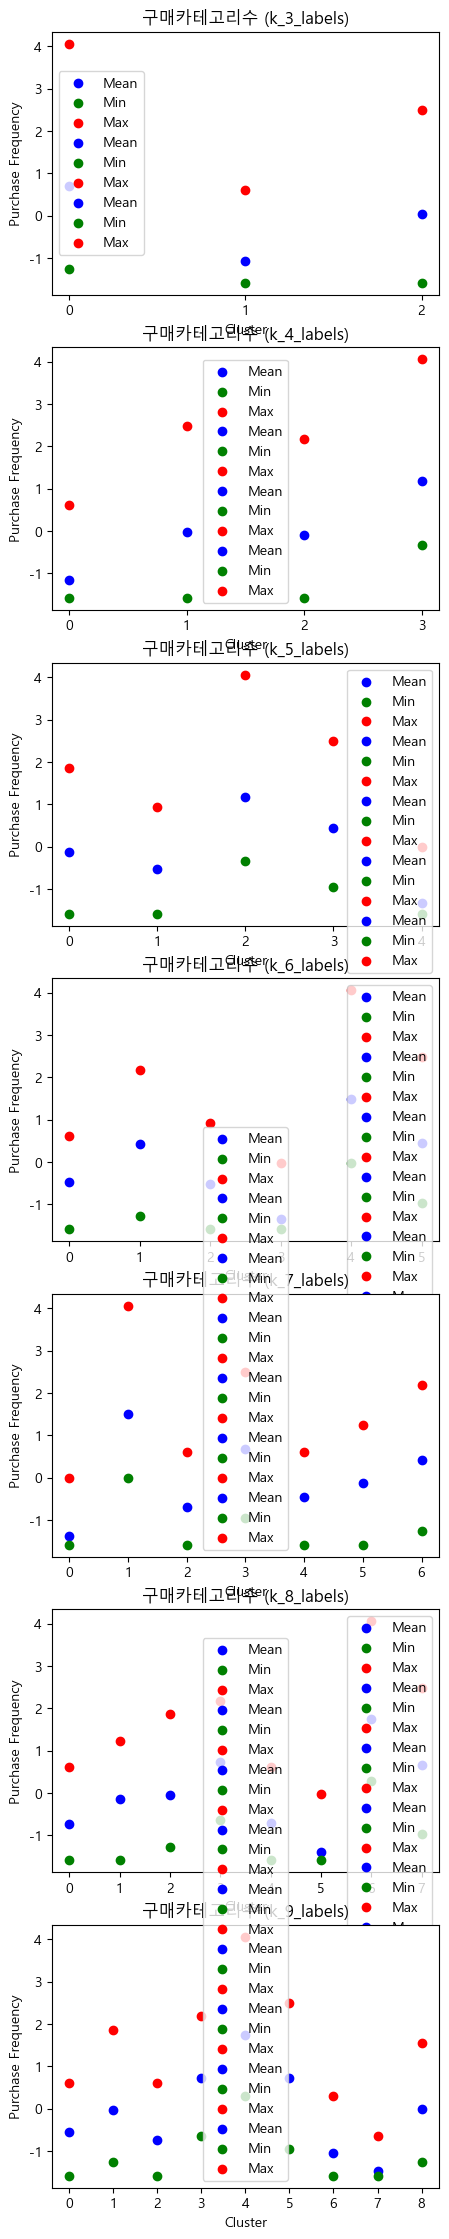

In [81]:
def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['구매카테고리수'].mean()
            min_val = cluster_data['구매카테고리수'].min()
            max_val = cluster_data['구매카테고리수'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'구매카테고리수 ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

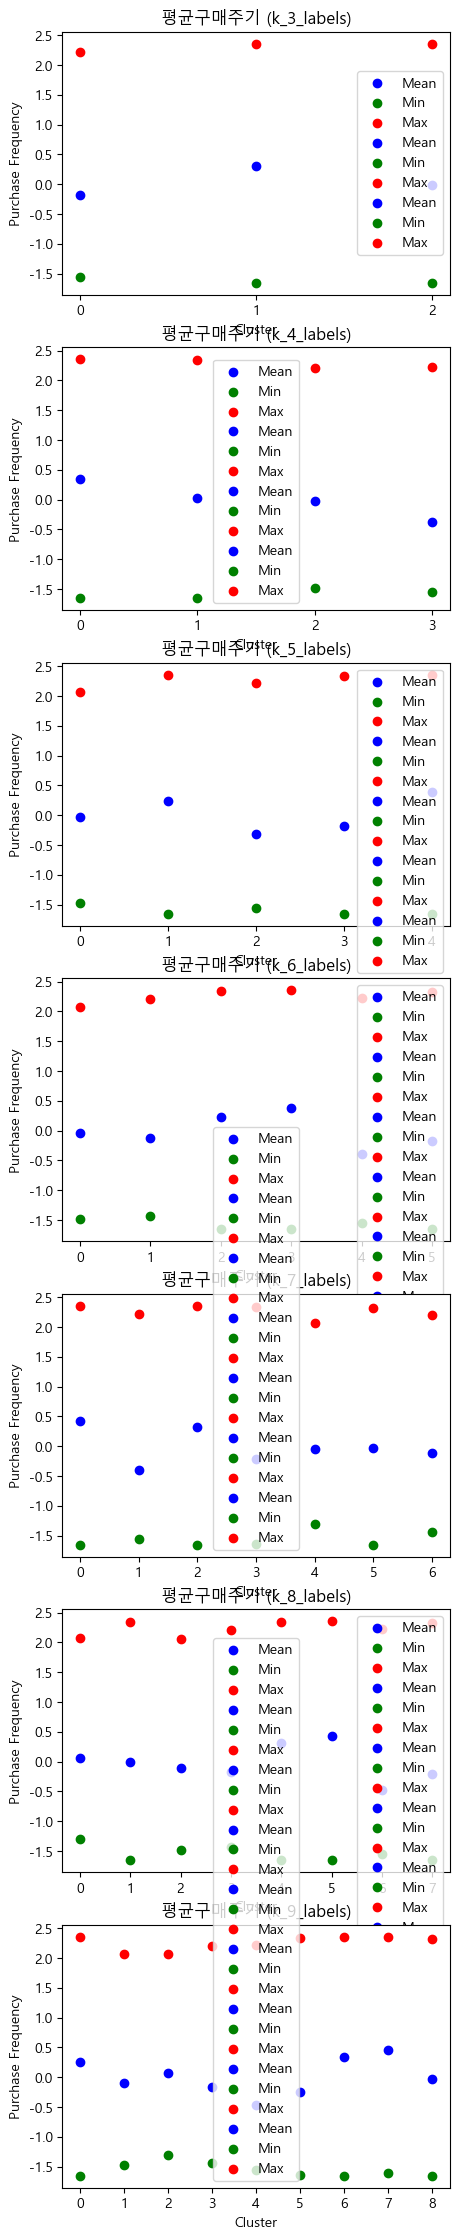

In [82]:
#상폐
def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['평균구매주기'].mean()
            min_val = cluster_data['평균구매주기'].min()
            max_val = cluster_data['평균구매주기'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'평균구매주기 ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

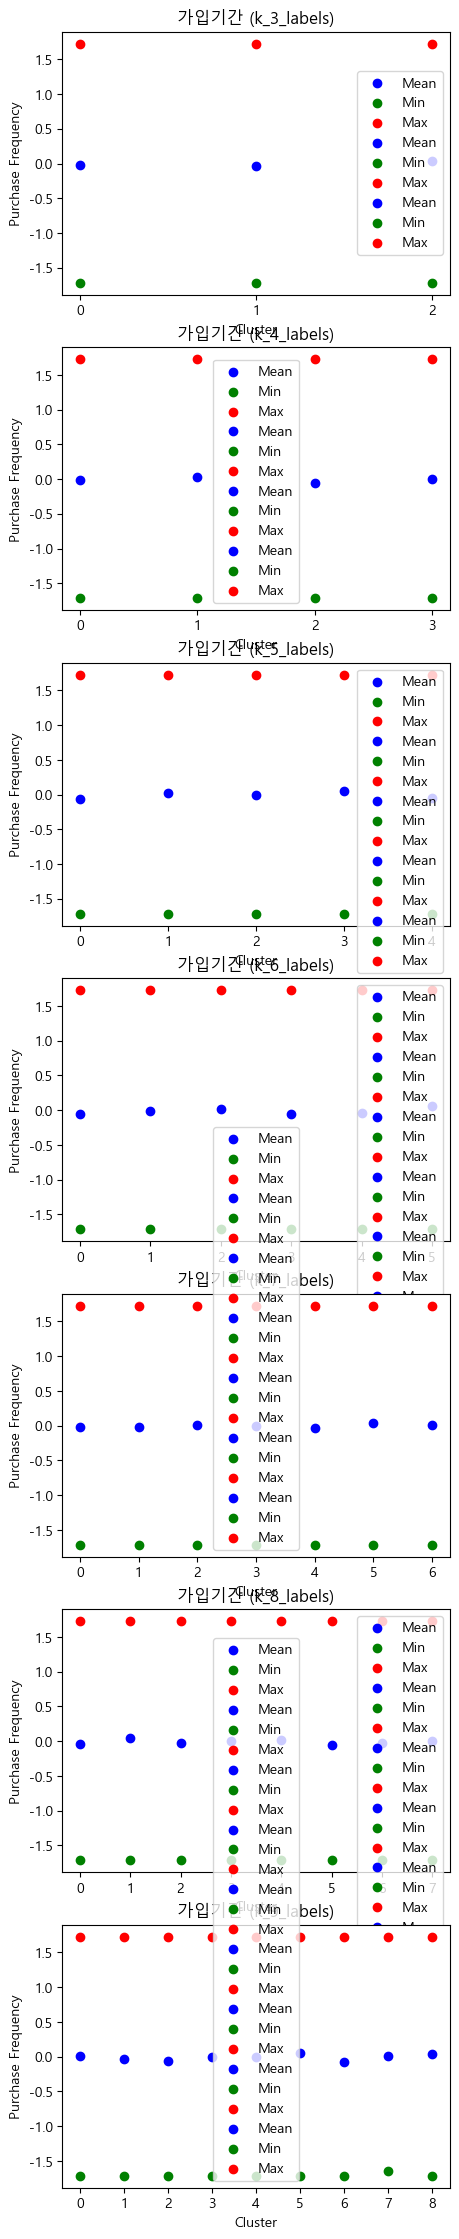

In [125]:
#상폐(가입기간)

def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['가입기간'].mean()
            min_val = cluster_data['가입기간'].min()
            max_val = cluster_data['가입기간'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'가입기간 ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

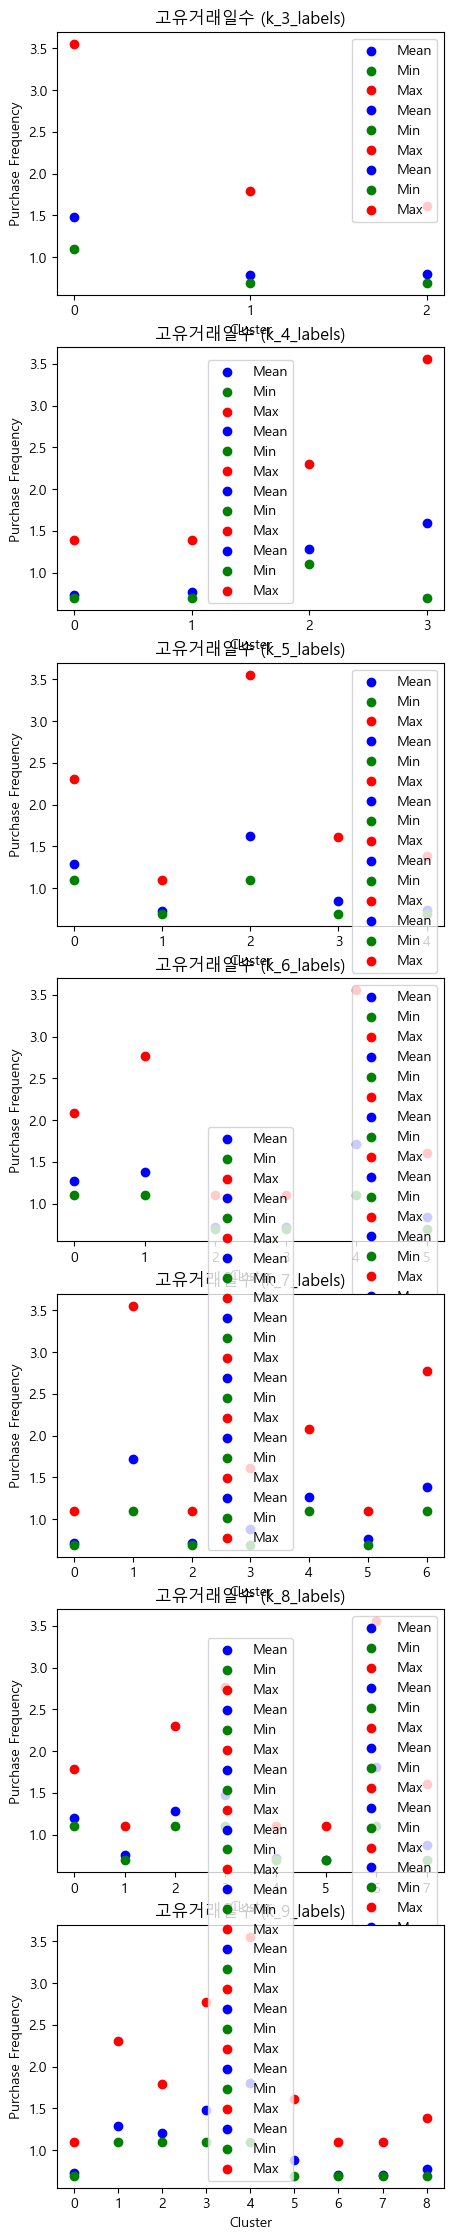

In [84]:
def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['고유거래일수'].mean()
            min_val = cluster_data['고유거래일수'].min()
            max_val = cluster_data['고유거래일수'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'고유거래일수 ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

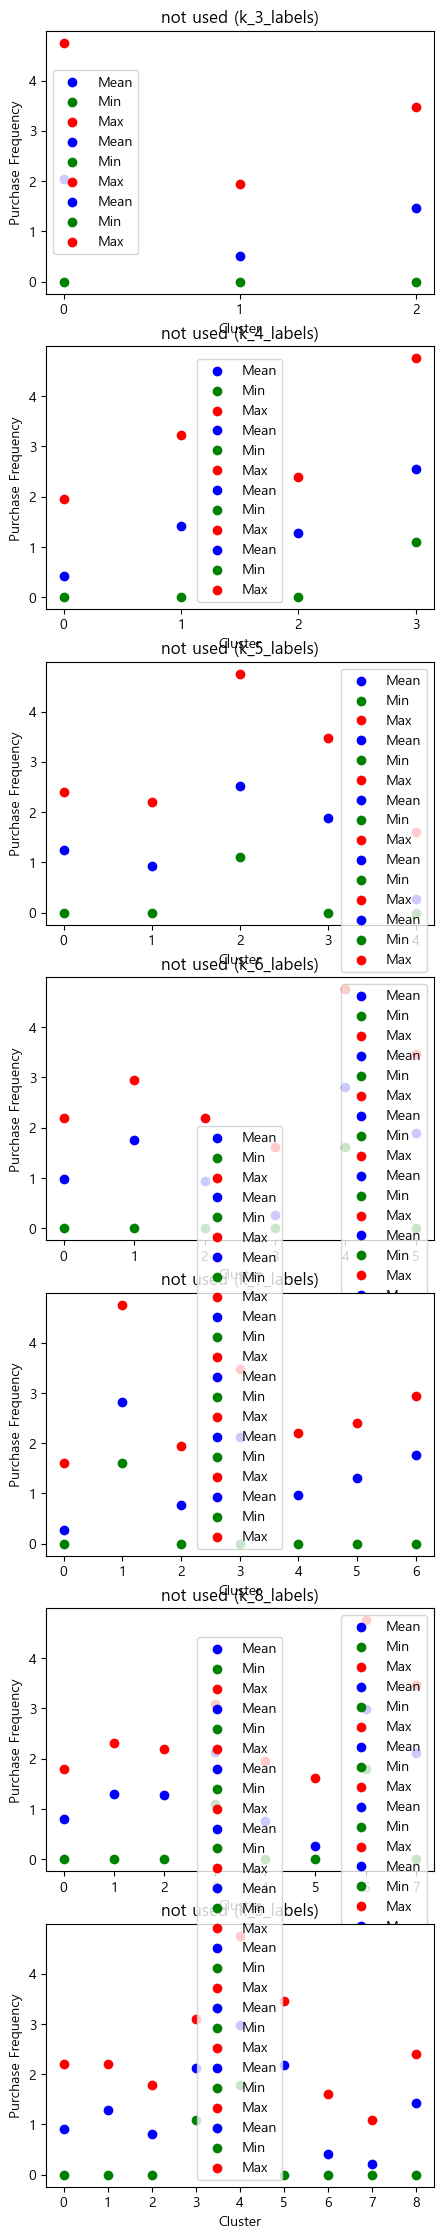

In [85]:
def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['not used개수'].mean()
            min_val = cluster_data['not used개수'].min()
            max_val = cluster_data['not used개수'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'not used ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

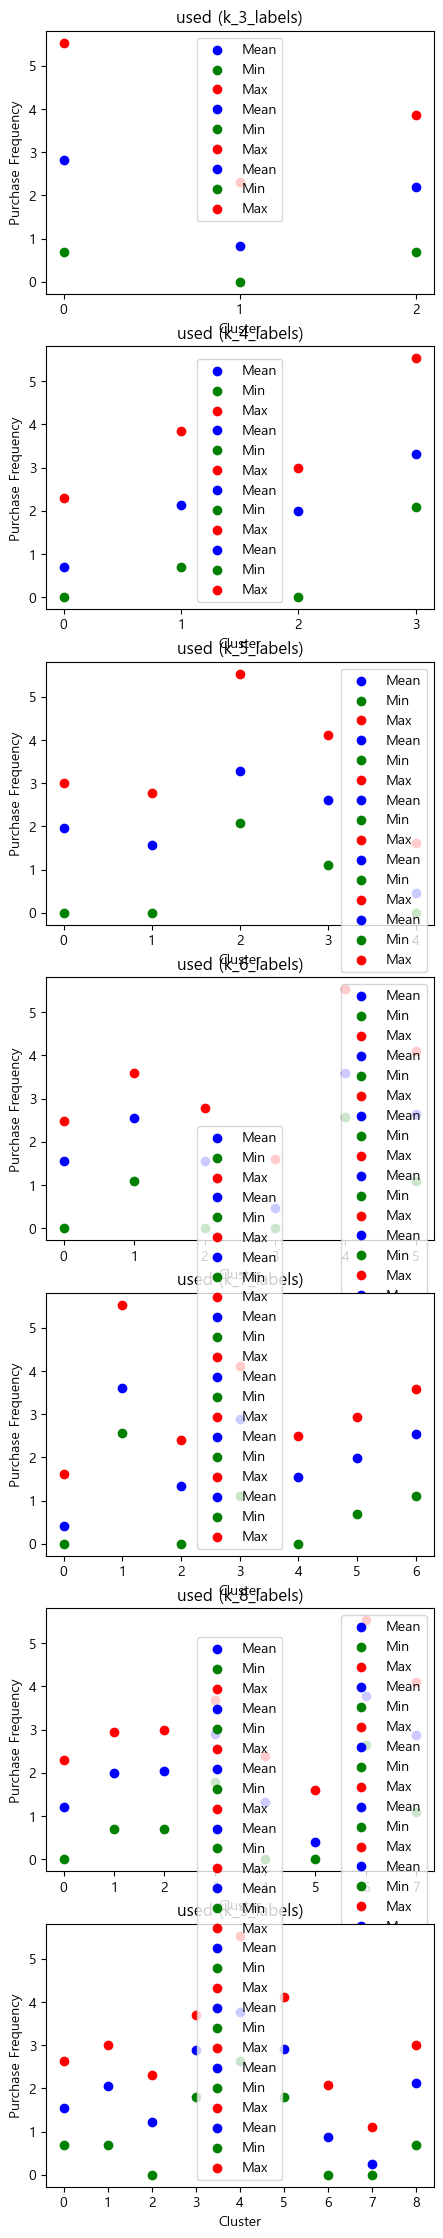

In [86]:
def print_cluster_purchase_frequency(rfm_core, label_columns):
    fig, axs = plt.subplots(len(label_columns), 1, figsize=(5, 4*len(label_columns)))
    
    for idx, label_column in enumerate(label_columns):
        cluster_statistics = {}
        for cluster_label in rfm_core[label_column].unique():
            cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
            mean = cluster_data['used개수'].mean()
            min_val = cluster_data['used개수'].min()
            max_val = cluster_data['used개수'].max()
            if cluster_label not in cluster_statistics:
                cluster_statistics[cluster_label] = {'mean': [], 'min': [], 'max': []}
            cluster_statistics[cluster_label]['mean'].append(mean)
            cluster_statistics[cluster_label]['min'].append(min_val)
            cluster_statistics[cluster_label]['max'].append(max_val)
        
        clusters = list(cluster_statistics.keys())
        for cluster_label, stats in cluster_statistics.items():
            axs[idx].scatter([cluster_label]*len(stats['mean']), stats['mean'], color='blue', label='Mean')
            axs[idx].scatter([cluster_label]*len(stats['min']), stats['min'], color='green', label='Min')
            axs[idx].scatter([cluster_label]*len(stats['max']), stats['max'], color='red', label='Max')
        
        # 각 subplot의 그래프 제목과 축 레이블 설정
        axs[idx].set_title(f'used ({label_column})')
        axs[idx].set_xlabel('Cluster')
        axs[idx].set_ylabel('Purchase Frequency')
        axs[idx].legend()
        axs[idx].set_xticks(clusters)  # x축 눈금 설정
    
    plt.tight_layout()
    plt.show()

label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']
print_cluster_purchase_frequency(rfm_core, label_columns)

In [87]:
rfm_core

,Recency,평균구매주기,가입기간,구매카테고리수,Used_ratio,Clicked_ratio,Frequency,Monetary,Length,총납세액,평균납세액,총구매수량,평균구매수량,총할인금액,평균할인금액,평균할인율,총배송료,평균배송료,당월구매횟수,고유거래일수,추가구매일수,used개수,not used개수,clicked개수,Used_ratio_per_F,Clicked_ratio_per_F,attempt_ratio,attempt_ratio_per_F,First_category_Apparel,First_category_Housewares,First_category_IT,First_category_Lifestyle,First_category_Nest,First_category_Stationery,Second_category_Apparel,Second_category_Housewares,Second_category_IT,Second_category_Lifestyle,Second_category_Nest,Second_category_None,Second_category_Stationery,Third_category_Apparel,Third_category_Housewares,Third_category_IT,Third_category_Lifestyle,Third_category_Nest,Third_category_None,Third_category_Stationery,성별_남,성별_여,고객지역_California,고객지역_Chicago,고객지역_New Jersey,고객지역_New York,고객지역_Washington DC,최다구매월_Apr,최다구매월_Aug,최다구매월_Dec,최다구매월_Feb,최다구매월_Jan,최다구매월_Jul,최다구매월_Jun,최다구매월_Mar,최다구매월_May,최다구매월_Nov,최다구매월_Oct,최다구매월_Sep,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels,k_10_labels,dbscan_labels,h_cluster_label3,h_cluster_label4,h_cluster_label5,h_cluster_label6,h_cluster_label7,h_cluster_label8,h_cluster_label9
0,-0.365961,-0.475194,0.364594,-1.271454,3.972191,-2.997581,0.693147,4.628801,0.000000,1.740150,1.208692,1.386294,1.386294,2.331853,1.731390,3.433987,4.330733,3.650658,0.693147,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,0,4,3,0,5,6,6,0,0,2,0,3,3,1,0
1,-0.837001,0.196981,-0.423659,1.238119,-0.035140,-0.444827,3.465736,9.642689,5.411646,7.634776,3.568550,5.837730,2.487591,6.662555,2.640898,2.197225,5.661084,1.753423,2.944439,1.386294,1.098612,3.044522,2.708050,3.295837,0.010695,0.013882,0.569095,0.024430,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0,3,2,4,1,6,4,2,-1,0,2,0,3,3,1,0
2,-0.699614,0.053730,0.937869,-0.016668,0.836019,-0.180160,2.197225,7.375936,4.787492,5.321061,2.287696,5.347108,3.300456,4.880565,1.899541,2.544747,4.407573,1.509570,1.609438,1.098612,0.693147,2.484907,0.693147,2.484907,0.058064,0.058064,0.671168,0.112940,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,2,0,1,6,2,1,7,-1,2,0,4,4,4,4,1
3,-1.249160,-1.466928,-0.065362,-0.644061,0.082723,-0.225359,2.484907,7.272056,0.000000,5.005718,2.274332,3.091042,1.067841,5.031855,2.297969,2.450143,4.423528,1.765838,2.484907,0.693147,0.000000,1.945910,1.386294,2.197225,0.031582,0.041891,0.600774,0.072196,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2,1,1,2,5,1,8,4,1,0,2,0,5,5,5,5
4,-0.365961,-0.475194,0.364594,0.297029,-0.202112,-0.215733,2.639057,7.341466,0.000000,5.028867,1.651645,4.043051,1.669157,5.336326,1.908505,2.319442,5.046581,1.666081,2.639057,0.693147,0.000000,2.484907,2.197225,2.890372,0.023232,0.035681,0.575364,0.058108,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2,1,3,5,5,1,8,4,0,0,2,0,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Text(0, 0.5, '고유거래일수')

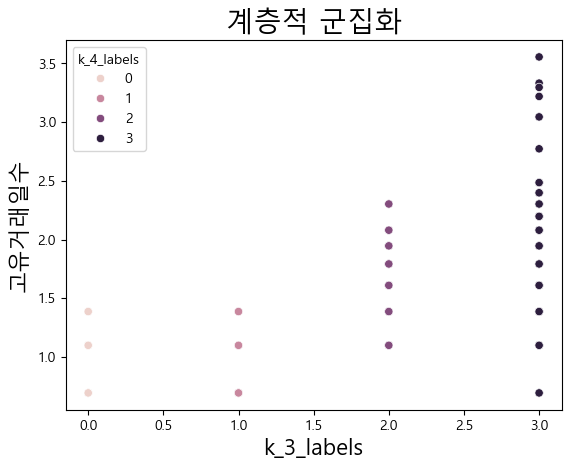

In [88]:
sns.scatterplot(data = rfm_core, x='k_4_labels', y='고유거래일수', hue='k_4_labels')
plt.title('계층적 군집화', fontsize=20)
plt.xlabel('k_3_labels', fontsize=16)
plt.ylabel('고유거래일수', fontsize=16)

In [89]:
h_cluster = AgglomerativeClustering(n_clusters=3, linkage = 'ward').fit(rfm_core.iloc[:, :3])

rfm_core2['h_cluster_label'] = h_cluster.labels_

In [90]:
rfm_core2.columns

Index(['Recency', '평균구매주기', '가입기간', '구매카테고리수', 'Used_ratio', 'Clicked_ratio',
       'Frequency', 'Monetary', 'Length', '총납세액', '평균납세액', '총구매수량', '평균구매수량',
       '총할인금액', '평균할인금액', '평균할인율', '총배송료', '평균배송료', '당월구매횟수', '고유거래일수',
       '추가구매일수', 'used개수', 'not used개수', 'clicked개수', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'attempt_ratio', 'attempt_ratio_per_F',
       'First_category_Apparel', 'First_category_Housewares',
       'First_category_IT', 'First_category_Lifestyle', 'First_category_Nest',
       'First_category_Stationery', 'Second_category_Apparel',
       'Second_category_Housewares', 'Second_category_IT',
       'Second_category_Lifestyle', 'Second_category_Nest',
       'Second_category_None', 'Second_category_Stationery',
       'Third_category_Apparel', 'Third_category_Housewares',
       'Third_category_IT', 'Third_category_Lifestyle', 'Third_category_Nest',
       'Third_category_None', 'Third_category_Stationery', '성별_남', '성별_여',
       '고객지역_California', '고

In [91]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt



In [92]:
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

for column in label_columns:
    print("Cluster Sizes for", column, ":")
    cluster_sizes = rfm_core[column].value_counts()
    print(cluster_sizes)
    print("-" * 28)

Cluster Sizes for h_cluster_label3 :
h_cluster_label3
0    784
2    460
1    224
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label4 :
h_cluster_label4
2    555
0    460
3    229
1    224
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label5 :
h_cluster_label5
0    555
4    265
3    229
1    224
2    195
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label6 :
h_cluster_label6
3    300
4    265
5    255
1    229
0    224
2    195
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label7 :
h_cluster_label7
3    300
4    265
5    255
1    229
0    195
2    162
6     62
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label8 :
h_cluster_label8
1    300
4    265
5    255
0    229
2    162
3    118
7     77
6     62
Name: count, dtype: int64
----------------------------
Cluster Sizes for h_cluster_label9 :
h_cluster_la

In [93]:
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['고유거래일수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['고유거래일수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['고유거래일수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,1.077128,3.555348,0.693147,1.132720,3.332205,0.693147,1.140203,3.555348,0.693147,0.707628,1.098612,0.693147,1.057487,1.945910,0.693147,0.924261,2.397895,0.693147,1.121192,3.555348,0.693147
1,0.707628,1.098612,0.693147,0.707628,1.098612,0.693147,0.707628,1.098612,0.693147,0.924261,2.397895,0.693147,0.924261,2.397895,0.693147,1.121192,3.555348,0.693147,1.188079,3.332205,0.693147
2,1.132720,3.332205,0.693147,1.140203,3.555348,0.693147,1.057487,1.945910,0.693147,1.057487,1.945910,0.693147,0.713170,1.098612,0.693147,0.713170,1.098612,0.693147,0.713170,1.098612,0.693147
3,NaN,NaN,NaN,0.924261,2.397895,0.693147,0.924261,2.397895,0.693147,1.121192,3.555348,0.693147,1.121192,3.555348,0.693147,0.953269,1.945910,0.693147,0.953269,1.945910,0.693147
4,NaN,NaN,NaN,NaN,NaN,NaN,1.188079,3.332205,0.693147,1.188079,3.332205,0.693147,1.188079,3.332205,0.693147,1.188079,3.332205,0.693147,1.083631,2.397895,0.693147
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.162570,3.044522,0.693147,1.162570,3.044522,0.693147,1.162570,3.044522,0.693147,1.162570,3.044522,0.693147
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.217198,1.791759,1.098612,1.217198,1.791759,1.098612
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745707,1.098612,0.693147


In [94]:
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['평균구매주기'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['평균구매주기'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['평균구매주기'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,-0.231787,2.202486,-1.654255,-0.388166,2.224524,-1.654255,-0.482004,2.202486,-1.654255,1.608380,2.356755,0.395327,0.199015,2.224524,-0.993099,0.374636,1.673561,-1.235523,-0.082725,2.202486,-1.466928
1,1.608380,2.356755,0.395327,1.608380,2.356755,0.395327,1.608380,2.356755,0.395327,0.374636,1.673561,-1.235523,0.374636,1.673561,-1.235523,-0.082725,2.202486,-1.466928,-0.820243,0.241058,-1.654255
2,-0.388166,2.224524,-1.654255,-0.482004,2.202486,-1.654255,0.199015,2.224524,-0.993099,0.199015,2.224524,-0.993099,1.401413,2.345736,0.395327,1.401413,2.345736,0.395327,1.401413,2.345736,0.395327
3,NaN,NaN,NaN,0.374636,1.673561,-1.235523,0.374636,1.673561,-1.235523,-0.082725,2.202486,-1.466928,-0.082725,2.202486,-1.466928,0.436789,2.224524,-0.552329,0.436789,2.224524,-0.552329
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.820243,0.241058,-1.654255,-0.820243,0.241058,-1.654255,-0.820243,0.241058,-1.654255,-0.820243,0.241058,-1.654255,-0.135783,0.483481,-1.235523
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.951745,0.439404,-1.654255,-0.951745,0.439404,-1.654255,-0.951745,0.439404,-1.654255,-0.951745,0.439404,-1.654255
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.149167,2.356755,1.938023,2.149167,2.356755,1.938023,2.149167,2.356755,1.938023
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.165367,0.615712,-0.993099,-0.165367,0.615712,-0.993099
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946494,1.673561,0.351250


In [95]:
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['추가구매일수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['추가구매일수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['추가구매일수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,0.594518,3.526361,0.0,0.680310,3.295837,0.0,0.684199,3.526361,0.0,0.024755,0.693147,0.0,0.597196,1.791759,0.0,0.377168,2.302585,0.000000,0.664727,3.526361,0.000000
1,0.024755,0.693147,0.0,0.024755,0.693147,0.0,0.024755,0.693147,0.0,0.377168,2.302585,0.0,0.377168,2.302585,0.0,0.664727,3.526361,0.000000,0.741470,3.295837,0.000000
2,0.680310,3.295837,0.0,0.684199,3.526361,0.0,0.597196,1.791759,0.0,0.597196,1.791759,0.0,0.034229,0.693147,0.0,0.034229,0.693147,0.000000,0.034229,0.693147,0.000000
3,NaN,NaN,NaN,0.377168,2.302585,0.0,0.377168,2.302585,0.0,0.664727,3.526361,0.0,0.664727,3.526361,0.0,0.428485,1.791759,0.000000,0.428485,1.791759,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,0.741470,3.295837,0.0,0.741470,3.295837,0.0,0.741470,3.295837,0.0,0.741470,3.295837,0.000000,0.633615,2.302585,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.707108,2.995732,0.0,0.707108,2.995732,0.0,0.707108,2.995732,0.000000,0.707108,2.995732,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855741,1.609438,0.693147,0.855741,1.609438,0.693147
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089852,0.693147,0.000000


In [96]:
pd.set_option('display.max_columns', None)

label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['가입기간'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['가입기간'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['가입기간'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,-0.701339,0.651231,-1.713528,1.026664,1.726122,-0.352000,-0.532633,0.651231,-1.713528,0.346359,1.726122,-1.641868,1.068325,1.726122,-0.352000,-1.110212,-0.065362,-1.713528,-0.125317,0.651231,-1.713528
1,0.346359,1.726122,-1.641868,0.346359,1.726122,-1.641868,0.346359,1.726122,-1.641868,-1.110212,-0.065362,-1.713528,-1.110212,-0.065362,-1.713528,-0.125317,0.651231,-1.713528,0.996007,1.726122,-0.065362
2,1.026664,1.726122,-0.352000,-0.532633,0.651231,-1.713528,1.068325,1.726122,-0.352000,1.068325,1.726122,-0.352000,0.677772,1.726122,-0.638637,0.677772,1.726122,-0.638637,0.677772,1.726122,-0.638637
3,NaN,NaN,NaN,-1.110212,-0.065362,-1.713528,-1.110212,-0.065362,-1.713528,-0.125317,0.651231,-1.713528,-0.125317,0.651231,-1.713528,1.206288,1.726122,-0.065362,1.206288,1.726122,-0.065362
4,NaN,NaN,NaN,NaN,NaN,NaN,0.996007,1.726122,-0.065362,0.996007,1.726122,-0.065362,0.996007,1.726122,-0.065362,0.996007,1.726122,-0.065362,-1.129000,-0.065362,-1.713528
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.011828,0.221275,-1.713528,-1.011828,0.221275,-1.713528,-1.011828,0.221275,-1.713528,-1.011828,0.221275,-1.713528
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.519590,0.579572,-1.641868,-0.519590,0.579572,-1.641868,-0.519590,0.579572,-1.641868
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856903,1.726122,-0.352000,0.856903,1.726122,-0.352000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.089162,-0.280340,-1.713528


In [97]:
# pd.set_option('display.max_columns', None)

# label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

# cluster_means = {}

# for column in label_columns:
#     cluster_means[column + '_mean'] = rfm_core2.groupby(column)['구매카테고리수'].mean()
#     cluster_means[column + '_max'] = rfm_core2.groupby(column)['구매카테고리수'].max()
#     cluster_means[column + '_min'] = rfm_core2.groupby(column)['구매카테고리수'].min()

# h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

# h_mean_purchase_by_cluster

In [98]:
pd.set_option('display.max_columns', None)

label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['used개수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['used개수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['used개수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,2.130757,5.533389,0.0,2.229747,5.393628,0.0,2.220108,5.533389,0.0,1.517502,3.526361,0.0,2.145540,3.951244,0.0,1.914208,4.521789,0.000000,2.183705,5.533389,0.000000
1,1.517502,3.526361,0.0,1.517502,3.526361,0.0,1.517502,3.526361,0.0,1.914208,4.521789,0.0,1.914208,4.521789,0.0,2.183705,5.533389,0.000000,2.291711,5.393628,0.000000
2,2.229747,5.393628,0.0,2.220108,5.533389,0.0,2.145540,3.951244,0.0,2.145540,3.951244,0.0,1.538031,3.496508,0.0,1.538031,3.496508,0.000000,1.538031,3.496508,0.000000
3,NaN,NaN,NaN,1.914208,4.521789,0.0,1.914208,4.521789,0.0,2.183705,5.533389,0.0,2.183705,5.533389,0.0,1.977241,3.912023,0.000000,1.977241,3.912023,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,2.291711,5.393628,0.0,2.291711,5.393628,0.0,2.291711,5.393628,0.0,2.291711,5.393628,0.000000,2.196707,4.521789,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.262936,5.342334,0.0,2.262936,5.342334,0.0,2.262936,5.342334,0.000000,2.262936,5.342334,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.463864,3.526361,0.0,1.463864,3.526361,0.000000,1.463864,3.526361,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403452,3.951244,0.693147,2.403452,3.951244,0.693147
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.597704,3.526361,0.000000


In [99]:
pd.set_option('display.max_columns', None)
label_columns = ['h_cluster_label3', 'h_cluster_label4', 'h_cluster_label5', 'h_cluster_label6', 'h_cluster_label7', 'h_cluster_label8', 'h_cluster_label9']

cluster_means = {}

for column in label_columns:
    cluster_means[column + '_mean'] = rfm_core2.groupby(column)['not used개수'].mean()
    cluster_means[column + '_max'] = rfm_core2.groupby(column)['not used개수'].max()
    cluster_means[column + '_min'] = rfm_core2.groupby(column)['not used개수'].min()

h_mean_purchase_by_cluster = pd.DataFrame(cluster_means)

h_mean_purchase_by_cluster

,h_cluster_label3_mean,h_cluster_label3_max,h_cluster_label3_min,h_cluster_label4_mean,h_cluster_label4_max,h_cluster_label4_min,h_cluster_label5_mean,h_cluster_label5_max,h_cluster_label5_min,h_cluster_label6_mean,h_cluster_label6_max,h_cluster_label6_min,h_cluster_label7_mean,h_cluster_label7_max,h_cluster_label7_min,h_cluster_label8_mean,h_cluster_label8_max,h_cluster_label8_min,h_cluster_label9_mean,h_cluster_label9_max,h_cluster_label9_min
0,1.478345,4.753590,0.0,1.574832,4.521789,0.0,1.526760,4.753590,0.0,0.980808,2.708050,0.0,1.463390,3.367296,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0
1,0.980808,2.708050,0.0,0.980808,2.708050,0.0,0.980808,2.708050,0.0,1.361006,3.784190,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0,1.656836,4.521789,0.0
2,1.574832,4.521789,0.0,1.526760,4.753590,0.0,1.463390,3.367296,0.0,1.463390,3.367296,0.0,0.977665,2.708050,0.0,0.977665,2.708050,0.0,0.977665,2.708050,0.0
3,NaN,NaN,NaN,1.361006,3.784190,0.0,1.361006,3.784190,0.0,1.502823,4.753590,0.0,1.502823,4.753590,0.0,1.249075,3.367296,0.0,1.249075,3.367296,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.656836,4.521789,0.0,1.601626,3.784190,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.554922,4.454347,0.0,1.554922,4.454347,0.0,1.554922,4.454347,0.0,1.554922,4.454347,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989022,2.708050,0.0,0.989022,2.708050,0.0,0.989022,2.708050,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.791820,3.178054,0.0,1.791820,3.178054,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.091424,3.218876,0.0


In [100]:
def print_cluster_purchase_frequency(rfm_core, label_column):
    for cluster_label in rfm_core2[label_column].unique():
        print(f"Cluster {cluster_label} - 평균구매주기:")
        print("-" * 30)
        cluster_data = rfm_core[rfm_core[label_column] == cluster_label]
        print(cluster_data['평균구매주기'].describe())
        print("\n")


label_column = 'h_cluster_label3'


print_cluster_purchase_frequency(rfm_core, label_column)

Cluster 0 - 평균구매주기:
------------------------------
count    784.000000
mean      -0.231787
std        0.777504
min       -1.654255
25%       -0.783733
50%       -0.282357
75%        0.243812
max        2.202486
Name: 평균구매주기, dtype: float64


Cluster 2 - 평균구매주기:
------------------------------
count    460.000000
mean      -0.388166
std        0.728303
min       -1.654255
25%       -0.960042
50%       -0.398059
75%        0.108826
max        2.224524
Name: 평균구매주기, dtype: float64


Cluster 1 - 평균구매주기:
------------------------------
count    224.000000
mean       1.608380
std        0.520042
min        0.395327
25%        1.166675
50%        1.634994
75%        2.092293
max        2.356755
Name: 평균구매주기, dtype: float64




In [101]:
rfm_core.head(3)

,Recency,평균구매주기,가입기간,구매카테고리수,Used_ratio,Clicked_ratio,Frequency,Monetary,Length,총납세액,평균납세액,총구매수량,평균구매수량,총할인금액,평균할인금액,평균할인율,총배송료,평균배송료,당월구매횟수,고유거래일수,추가구매일수,used개수,not used개수,clicked개수,Used_ratio_per_F,Clicked_ratio_per_F,attempt_ratio,attempt_ratio_per_F,First_category_Apparel,First_category_Housewares,First_category_IT,First_category_Lifestyle,First_category_Nest,First_category_Stationery,Second_category_Apparel,Second_category_Housewares,Second_category_IT,Second_category_Lifestyle,Second_category_Nest,Second_category_None,Second_category_Stationery,Third_category_Apparel,Third_category_Housewares,Third_category_IT,Third_category_Lifestyle,Third_category_Nest,Third_category_None,Third_category_Stationery,성별_남,성별_여,고객지역_California,고객지역_Chicago,고객지역_New Jersey,고객지역_New York,고객지역_Washington DC,최다구매월_Apr,최다구매월_Aug,최다구매월_Dec,최다구매월_Feb,최다구매월_Jan,최다구매월_Jul,최다구매월_Jun,최다구매월_Mar,최다구매월_May,최다구매월_Nov,최다구매월_Oct,최다구매월_Sep,k_3_labels,k_4_labels,k_5_labels,k_6_labels,k_7_labels,k_8_labels,k_9_labels,k_10_labels,dbscan_labels,h_cluster_label3,h_cluster_label4,h_cluster_label5,h_cluster_label6,h_cluster_label7,h_cluster_label8,h_cluster_label9,h_cluster_label
0,-0.365961,-0.475194,0.364594,-1.271454,3.972191,-2.997581,0.693147,4.628801,0.000000,1.740150,1.208692,1.386294,1.386294,2.331853,1.731390,3.433987,4.330733,3.650658,0.693147,0.693147,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,0,4,3,0,5,6,6,0,0,2,0,3,3,1,0,0
1,-0.837001,0.196981,-0.423659,1.238119,-0.035140,-0.444827,3.465736,9.642689,5.411646,7.634776,3.568550,5.837730,2.487591,6.662555,2.640898,2.197225,5.661084,1.753423,2.944439,1.386294,1.098612,3.044522,2.708050,3.295837,0.010695,0.013882,0.569095,0.024430,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0,3,2,4,1,6,4,2,-1,0,2,0,3,3,1,0,0
2,-0.699614,0.053730,0.937869,-0.016668,0.836019,-0.180160,2.197225,7.375936,4.787492,5.321061,2.287696,5.347108,3.300456,4.880565,1.899541,2.544747,4.407573,1.509570,1.609438,1.098612,0.693147,2.484907,0.693147,2.484907,0.058064,0.058064,0.671168,0.112940,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,2,0,1,6,2,1,7,-1,2,0,4,4,4,4,1,2


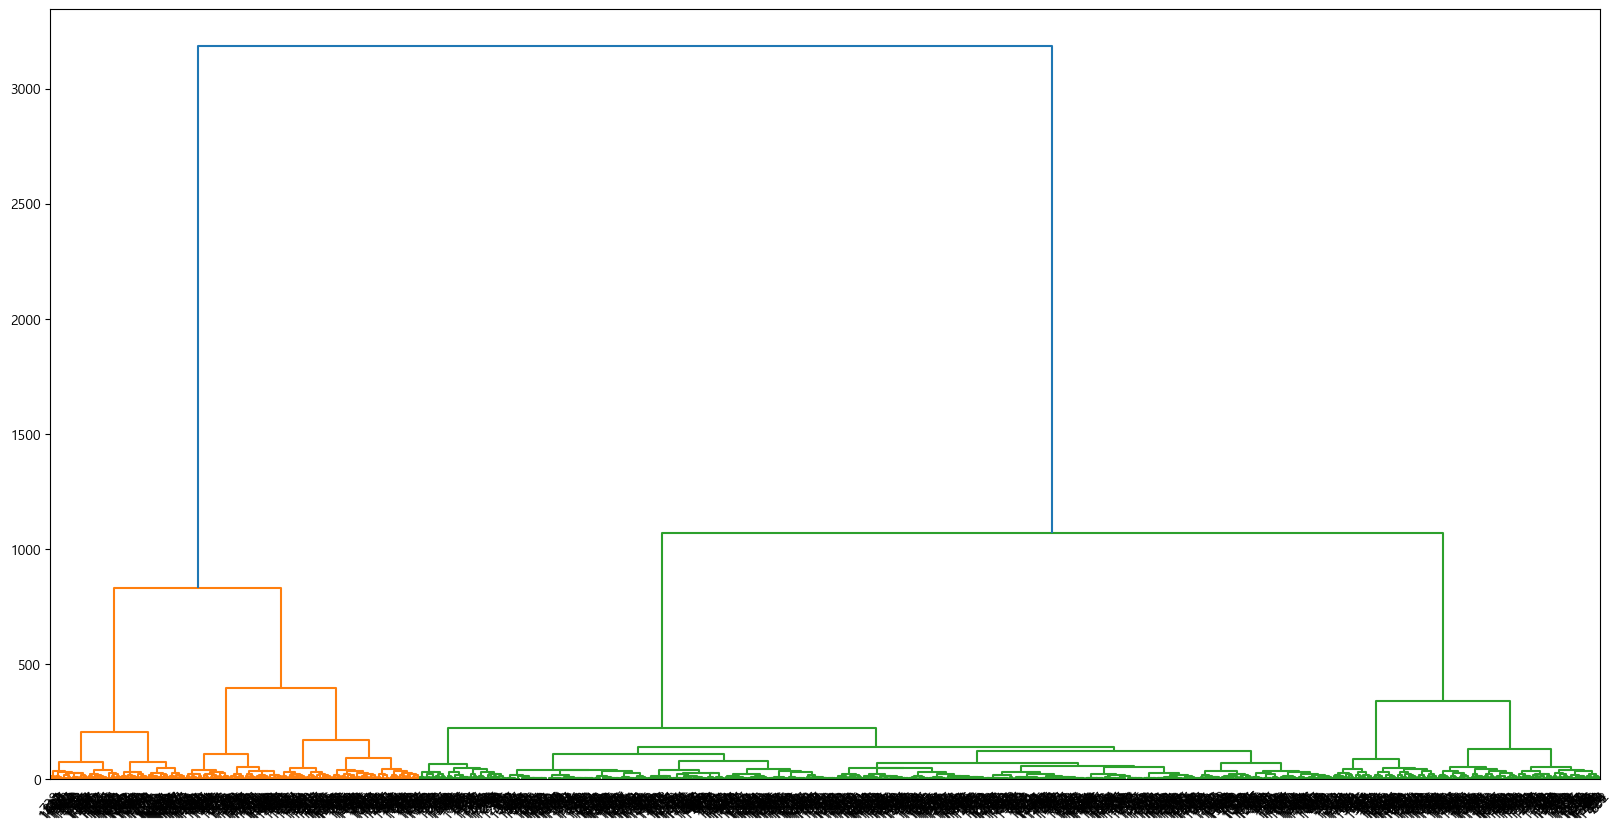

In [102]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# from matplotlib import pyplot as plt

# clusters = linkage(rfm_core, method='ward', metric='euclidean')

# # 덴드로그램 그리기

# plt.figure(figsize=(20, 10))               # 이미지 크기 설정
# dendrogram(clusters,
#            leaf_rotation=50,               # 라벨 50% 기울리기
#            leaf_font_size=10,              # 라벨 폰트 크기
#            labels=rfm_core.index)          # 라벨에 사용할 변수
# plt.show()

In [103]:
# import pingouin as pg
# results = []

# for k in range(3, 10): 
#     cluster_column = f'k_{k}_labels' 
#     for label in range(k):

#         group_data = rfm_core2[rfm_core2[cluster_column] == label]['used개수']
#         normality_test = pg.normality(group_data)
#         results.append({
#             'K': k,
#             'Cluster': label,
#             'W': normality_test['W'][0],
#             'pval': normality_test['pval'][0],
#             'Normal': normality_test['normal'][0]
#         })


# results_df = pd.DataFrame(results)
# results_df

,K,Cluster,W,pval,Normal
0,3,0,0.992371,9.051019e-03,False
1,3,1,0.909294,4.909518e-14,False
2,3,2,0.987147,5.601877e-05,False
3,4,0,0.885235,3.741399e-14,False
4,4,1,0.987641,9.222472e-05,False
5,4,2,0.953699,7.471142e-08,False
6,4,3,0.947680,4.026377e-09,False
7,5,0,0.957816,3.505391e-07,False
8,5,1,0.969408,3.609650e-07,False
9,5,2,0.944129,3.198095e-09,False


In [126]:
results2 = []

for k in range(3, 10): 
    cluster_column = f'h_cluster_label{k}' 
    for label in range(k):

        group_data = rfm_core2[rfm_core2[cluster_column] == label]['used개수']
        normality_test = pg.normality(group_data)
        results2.append({
            'K': k,
            'Cluster': label,
            'W': normality_test['W'][0],
            'pval': normality_test['pval'][0],
            'Normal': normality_test['normal'][0]
        })


results_df2 = pd.DataFrame(results)
results_df2

,K,Cluster,W,pval,Normal
0,3,0,0.992371,9.051019e-03,False
1,3,1,0.909294,4.909518e-14,False
2,3,2,0.987147,5.601877e-05,False
3,4,0,0.885235,3.741399e-14,False
4,4,1,0.987641,9.222472e-05,False
5,4,2,0.953699,7.471142e-08,False
6,4,3,0.947680,4.026377e-09,False
7,5,0,0.957816,3.505391e-07,False
8,5,1,0.969408,3.609650e-07,False
9,5,2,0.944129,3.198095e-09,False


In [105]:
from scipy.stats import f_oneway


group1_data = rfm_core2[rfm_core2['k_3_labels'] == 0]['used개수']
group2_data = rfm_core2[rfm_core2['k_3_labels'] == 1]['used개수']
group3_data = rfm_core2[rfm_core2['k_3_labels'] == 2]['used개수']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data)


print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 963.3749887571814
p-value: 8.721757940914243e-268


In [106]:
from scipy.stats import f_oneway
group1_data = rfm_core2[rfm_core2['k_4_labels'] == 0]['used개수']
group2_data = rfm_core2[rfm_core2['k_4_labels'] == 1]['used개수']
group3_data = rfm_core2[rfm_core2['k_4_labels'] == 2]['used개수']
group4_data = rfm_core2[rfm_core2['k_4_labels'] == 3]['used개수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1025.3473697058312
p-value: 0.0


In [107]:
group1_data = rfm_core2[rfm_core2['k_5_labels'] == 0]['used개수']
group2_data = rfm_core2[rfm_core2['k_5_labels'] == 1]['used개수']
group3_data = rfm_core2[rfm_core2['k_5_labels'] == 2]['used개수']
group4_data = rfm_core2[rfm_core2['k_5_labels'] == 3]['used개수']
group5_data = rfm_core2[rfm_core2['k_5_labels'] == 4]['used개수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1064.1010480897248
p-value: 0.0


In [108]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['used개수']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['used개수']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['used개수']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['used개수']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['used개수']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['used개수']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['used개수']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['used개수']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['used개수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 850.48224775802
p-value: 0.0


In [109]:
group1_data = rfm_core2[rfm_core2['k_3_labels'] == 0]['not used개수']
group2_data = rfm_core2[rfm_core2['k_3_labels'] == 1]['not used개수']
group3_data = rfm_core2[rfm_core2['k_3_labels'] == 2]['not used개수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 510.0193260425749
p-value: 7.843846761189854e-169


In [110]:
group1_data = rfm_core2[rfm_core2['k_5_labels'] == 0]['not used개수']
group2_data = rfm_core2[rfm_core2['k_5_labels'] == 1]['not used개수']
group3_data = rfm_core2[rfm_core2['k_5_labels'] == 2]['not used개수']
group4_data = rfm_core2[rfm_core2['k_5_labels'] == 3]['not used개수']
group5_data = rfm_core2[rfm_core2['k_5_labels'] == 4]['not used개수']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 455.6293781363674
p-value: 8.432225909331596e-201


In [111]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['not used개수']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['not used개수']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['not used개수']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['not used개수']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['not used개수']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['not used개수']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['not used개수']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['not used개수']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['not used개수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 430.94868532267935
p-value: 0.0


In [112]:
group1_data = rfm_core2[rfm_core2['k_3_labels'] == 0]['고유거래일수']
group2_data = rfm_core2[rfm_core2['k_3_labels'] == 1]['고유거래일수']
group3_data = rfm_core2[rfm_core2['k_3_labels'] == 2]['고유거래일수']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 982.7947728742928
p-value: 2.0818216050225287e-271


In [113]:
group1_data = rfm_core2[rfm_core2['k_5_labels'] == 0]['고유거래일수']
group2_data = rfm_core2[rfm_core2['k_5_labels'] == 1]['고유거래일수']
group3_data = rfm_core2[rfm_core2['k_5_labels'] == 2]['고유거래일수']
group4_data = rfm_core2[rfm_core2['k_5_labels'] == 3]['고유거래일수']
group5_data = rfm_core2[rfm_core2['k_5_labels'] == 4]['고유거래일수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 774.0850534160293
p-value: 6.13044960728624e-286


In [114]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['고유거래일수']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['고유거래일수']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['고유거래일수']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['고유거래일수']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['고유거래일수']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['고유거래일수']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['고유거래일수']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['고유거래일수']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['고유거래일수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 423.0589024823806
p-value: 0.0


In [115]:
# #상폐 가입기간
# group1_data = rfm_core2[rfm_core2['k_4_labels'] == 0]['가입기간']
# group2_data = rfm_core2[rfm_core2['k_4_labels'] == 1]['가입기간']
# group3_data = rfm_core2[rfm_core2['k_4_labels'] == 2]['가입기간']
# group4_data = rfm_core2[rfm_core2['k_4_labels'] == 3]['가입기간']


# f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

F-statistic: 0.5583321495129393
p-value: 0.6425931369183168


In [116]:
# #상폐 가입기간
# group1_data = rfm_core2[rfm_core2['k_6_labels'] == 0]['가입기간']
# group2_data = rfm_core2[rfm_core2['k_6_labels'] == 1]['가입기간']
# group3_data = rfm_core2[rfm_core2['k_6_labels'] == 2]['가입기간']
# group4_data = rfm_core2[rfm_core2['k_6_labels'] == 3]['가입기간']
# group5_data = rfm_core2[rfm_core2['k_6_labels'] == 4]['가입기간']
# group6_data = rfm_core2[rfm_core2['k_6_labels'] == 5]['가입기간']


# f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data)

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

F-statistic: 0.5161499200915725
p-value: 0.7642319570869832


In [117]:
# #상폐 가입기간

# group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['가입기간']
# group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['가입기간']
# group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['가입기간']
# group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['가입기간']
# group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['가입기간']
# group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['가입기간']
# group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['가입기간']
# group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['가입기간']
# group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['가입기간']

# f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

F-statistic: 0.25650365537163256
p-value: 0.9792855897421231


In [118]:
group1_data = rfm_core2[rfm_core2['k_4_labels'] == 0]['평균구매주기']
group2_data = rfm_core2[rfm_core2['k_4_labels'] == 1]['평균구매주기']
group3_data = rfm_core2[rfm_core2['k_4_labels'] == 2]['평균구매주기']
group4_data = rfm_core2[rfm_core2['k_4_labels'] == 3]['평균구매주기']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 27.9544797344397
p-value: 1.4083457120444237e-17


In [119]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['평균구매주기']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['평균구매주기']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['평균구매주기']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['평균구매주기']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['평균구매주기']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['평균구매주기']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['평균구매주기']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['평균구매주기']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['평균구매주기']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 13.333571567557637
p-value: 9.636536842121274e-19


In [120]:
group1_data = rfm_core2[rfm_core2['k_4_labels'] == 0]['추가구매일수']
group2_data = rfm_core2[rfm_core2['k_4_labels'] == 1]['추가구매일수']
group3_data = rfm_core2[rfm_core2['k_4_labels'] == 2]['추가구매일수']
group4_data = rfm_core2[rfm_core2['k_4_labels'] == 3]['추가구매일수']


f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1101.6808384552999
p-value: 0.0


In [121]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['추가구매일수']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['추가구매일수']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['추가구매일수']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['추가구매일수']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['추가구매일수']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['추가구매일수']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['추가구매일수']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['추가구매일수']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['추가구매일수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 510.15228100319297
p-value: 0.0


In [122]:
group1_data = rfm_core2[rfm_core2['k_5_labels'] == 0]['구매카테고리수']
group2_data = rfm_core2[rfm_core2['k_5_labels'] == 1]['구매카테고리수']
group3_data = rfm_core2[rfm_core2['k_5_labels'] == 2]['구매카테고리수']
group4_data = rfm_core2[rfm_core2['k_5_labels'] == 3]['구매카테고리수']
group5_data = rfm_core2[rfm_core2['k_5_labels'] == 4]['구매카테고리수']



f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 641.4832008110864
p-value: 7.0617e-320


In [123]:
group1_data = rfm_core2[rfm_core2['k_9_labels'] == 0]['구매카테고리수']
group2_data = rfm_core2[rfm_core2['k_9_labels'] == 1]['구매카테고리수']
group3_data = rfm_core2[rfm_core2['k_9_labels'] == 2]['구매카테고리수']
group4_data = rfm_core2[rfm_core2['k_9_labels'] == 3]['구매카테고리수']
group5_data = rfm_core2[rfm_core2['k_9_labels'] == 4]['구매카테고리수']
group6_data = rfm_core2[rfm_core2['k_9_labels'] == 5]['구매카테고리수']
group7_data = rfm_core2[rfm_core2['k_9_labels'] == 6]['구매카테고리수']
group8_data = rfm_core2[rfm_core2['k_9_labels'] == 7]['구매카테고리수']
group9_data = rfm_core2[rfm_core2['k_9_labels'] == 8]['구매카테고리수']

f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data,group4_data,group5_data,group6_data,group7_data,group8_data,group9_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 453.52043733220125
p-value: 0.0
